In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Algerian_forest_fires_clean_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0', 'day', 'month', 'year'] , axis=1 , inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [10]:
x=df.drop(['FWI'] , axis=1)
y=df['FWI']

In [11]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [12]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.25 , random_state = 42)

In [15]:
X_train.shape , X_test.shape

((182, 11), (61, 11))

<AxesSubplot: >

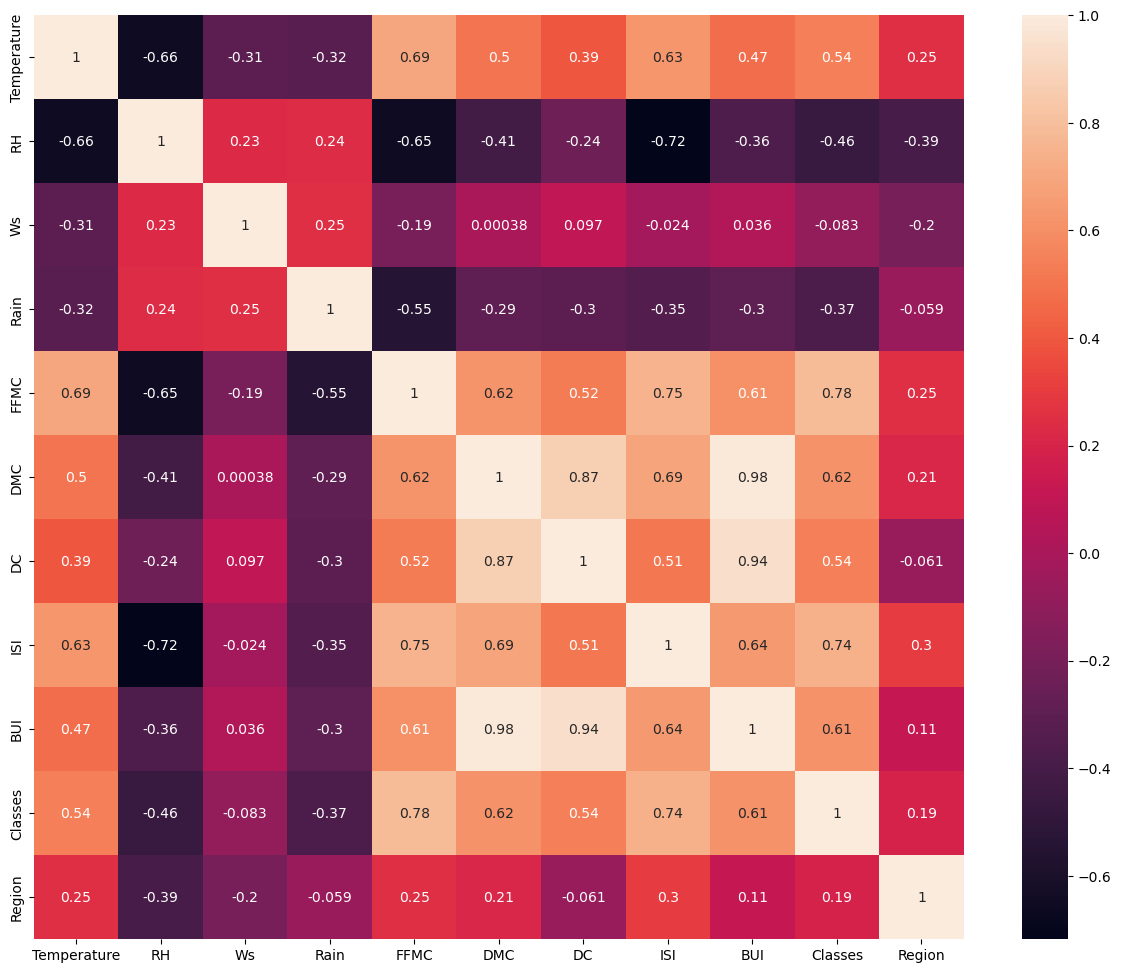

In [16]:
plt.figure(figsize=(15,12))
sns.heatmap(X_train.corr() ,annot =True)

In [17]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [18]:
######### FEATURE SELECTION PROCESS

In [19]:
def correlation(dataset , threshold):
    col_corr = set()
    corr_matricx = dataset.corr()
    for i in range(len(corr_matricx.columns)):
        for j in range(i):
            if abs(corr_matricx.iloc[i,j]) > threshold:
                colname = corr_matricx.columns[i]
                col_corr.add(colname)

    return col_corr

In [20]:
cor_relation = correlation(X_train , 0.85)

In [21]:
cor_relation

{'BUI', 'DC'}

In [22]:
X_train.drop(cor_relation ,axis=1 , inplace=True)
X_test.drop(cor_relation , axis=1 , inplace=True)
X_train.shape , X_test.shape

((182, 9), (61, 9))

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

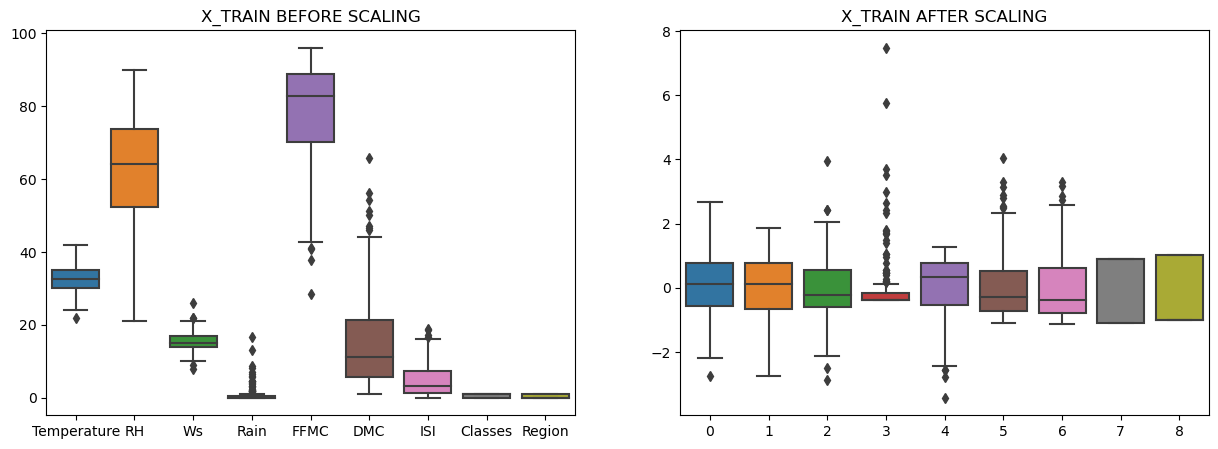

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.boxplot(X_train)
plt.title('X_TRAIN BEFORE SCALING')
plt.subplot(122)
sns.boxplot(X_train_scaled)
plt.title('X_TRAIN AFTER SCALING')
plt.show()

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linerg = LinearRegression()
linerg.fit(X_train_scaled , y_train)
y_pred = linerg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
rscore = r2_score(y_test , y_pred)
print('Mean absolute error', mae)
print('R2 score' , rscore)

Mean absolute error 0.5468236465249985
R2 score 0.9847657384266951


# Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled , y_train)
y_pred = lasso.predict(X_test_scaled)
mae  = mean_absolute_error(y_test , y_pred)
r_score=r2_score(y_test,y_pred)
print('Mean Absolute Error' , mae)
print('r2 score',r_score)

Mean Absolute Error 1.133175994914409
r2 score 0.9492020263112388


# Ridge Regression

In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled , y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
r2_score = r2_score(y_test , y_pred)
print('mean_absolute_error' , mae)
print('r2_score' , r2_score)

mean_absolute_error 0.5642305340105692
r2_score 0.9842993364555513


In [35]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
en = ElasticNet()
en.fit(X_train_scaled , y_train)
y_pred = en.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
r_score = r2_score(y_test , y_pred)
print('mean absolute error' , mae)
print('r2 score' , r_score)

mean absolute error 1.8822353634896005
r2 score 0.8753460589519703


In [41]:
import pickle
pickle.dump(scaler , open('scaler.pkl' , 'wb'))
pickle.dump(ridge , open('ridge.pkl' , 'wb'))